Image dimensions: (211, 240, 256)
Image spacing: (1.0, 1.0, 1.0)


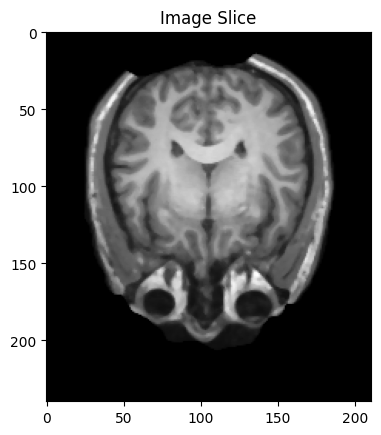

In [31]:
import SimpleITK as sitk

# Load the NIfTI image
image = sitk.ReadImage('sub-01_ses-2015_T1w.nii')

# Convert to a NumPy array for further processing
image_array = sitk.GetArrayFromImage(image)

# Print image dimensions
print(f"Image dimensions: {image.GetSize()}")
print(f"Image spacing: {image.GetSpacing()}")

# Display an image slice (for 3D images)
import matplotlib.pyplot as plt
plt.imshow(image_array[image_array.shape[0] // 2], cmap='gray')
plt.title('Image Slice')
plt.show()


In [34]:
import SimpleITK as sitk
import numpy as np

def extract_statistics(image):
    # Convert to float (if not already)
    image = sitk.Cast(image, sitk.sitkFloat32)
    
    # Convert SimpleITK image to numpy array
    image_array = sitk.GetArrayFromImage(image)
    
    # Calculate statistics
    min_intensity = np.min(image_array)
    max_intensity = np.max(image_array)
    mean_intensity = np.mean(image_array)
    median_intensity = np.median(image_array)
    std_dev_intensity = np.std(image_array)

    return {
        'min': min_intensity,
        'max': max_intensity,
        'mean': mean_intensity,
        'median': median_intensity,
        'std_dev': std_dev_intensity
    }

# Load the MRI image
image = sitk.ReadImage('sub-01_ses-2015_T1w.nii')

# Extract statistics from the image
stats = extract_statistics(image)
print(stats)


{'min': 0.0, 'max': 645.33344, 'mean': 59.514603, 'median': 0.0, 'std_dev': 103.467545}


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np

# Simulated example data (replace with your actual features and labels)
# Features array with multiple samples
X = np.array([
    [0.5, 0.2],  # Example feature vector 1
    [0.6, 0.3],  # Example feature vector 2
    [0.7, 0.4],  # Example feature vector 3
    [0.8, 0.5]   # Example feature vector 4
])

# Labels corresponding to the features
y = np.array([0, 1, 0, 1])  # Example labels (0 or 1 for classification)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a simple classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(

In [37]:
# Print feature importances if using a model that supports it (e.g., RandomForestClassifier)
if hasattr(clf, 'feature_importances_'):
    print("Feature importances:", clf.feature_importances_)


Feature importances: [0.484375 0.515625]


In [39]:
import SimpleITK as sitk
image = sitk.ReadImage('sub-01_ses-2015_T1w.nii')


In [42]:
def extract_statistics(image):
    # Code as shown above
    stats = extract_statistics(image)
    print(stats)


In [43]:
from sklearn.metrics import classification_report
import pandas as pd

# Assume y_test and y_pred are your true and predicted labels
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the classification report to a DataFrame for easy visualization
report_df = pd.DataFrame(report).transpose()


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(

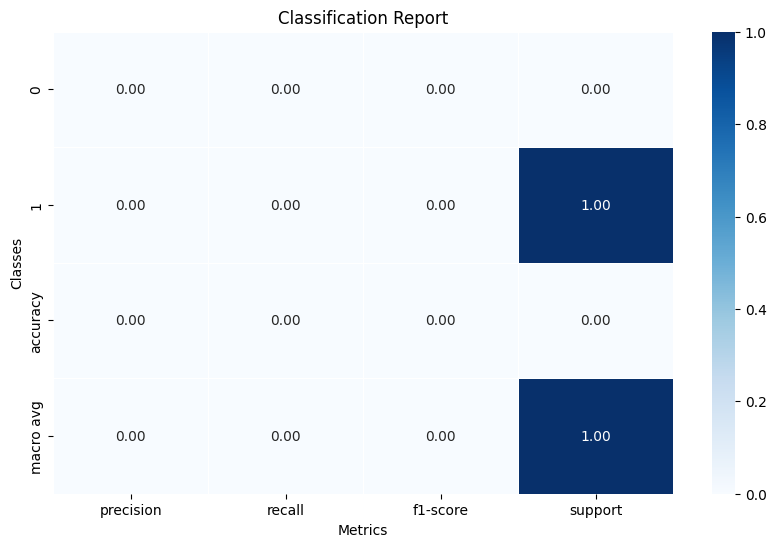

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a heatmap of the classification report
sns.heatmap(report_df.iloc[:-1, :].astype(float), annot=True, cmap='Blues', fmt='.2f', linewidths=.5)

# Add labels and title
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')

# Show the plot
plt.show()
